In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('iris.csv')

In [3]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
X = data.iloc[:,:-1]
Y = data.iloc[:,4]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

class metrics_:
     
    def __init__(self, y_test, y_pred):
        self.y_test = y_test
        self.y_pred = y_pred
        
    def cr(self):
        print(classification_report(self.y_pred, self.y_test))
        
    def cm(self):
        print(confusion_matrix(self.y_pred, self.y_test))

In [9]:
#Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

In [11]:
y_predlr = lr.predict(X_test)

In [12]:
reports = metrics_(y_test, y_predlr)
reports.cr()
reports.cm()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [13]:
#Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
ypredrf = rf.predict(X_test)
reports = metrics_(y_test, ypredrf)
reports.cr()
reports.cm()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [15]:
# SVC

In [16]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
ypredsvm = svm.predict(X_test)
reports = metrics_(y_test, ypredsvm)
reports.cr()
reports.cm()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [17]:
#KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from  sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  1]
 [ 0  0  8]]


In [21]:
# VotingClassifier 

In [22]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

algos = [('lg', LogisticRegression()), ('smv', SVC(probability=True)), 
         ('knn', KNeighborsClassifier()), ('rf', RandomForestClassifier())]

In [23]:
vc = VotingClassifier(estimators=algos, voting='soft')

In [24]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('lg', LogisticRegression()),
                             ('smv', SVC(probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [25]:
vcpred = vc.predict(X_test)

In [26]:
reports = metrics_(y_test, vcpred)
reports.cr()
reports.cm()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [27]:
 # Desicion tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [29]:
ypredictdr = dt.predict(X_test)

In [30]:
reports = metrics_(y_test, ypredictdr)
reports.cr()
reports.cm()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [31]:
from sklearn import tree

[Text(0.5, 0.9, 'X[3] <= -0.516\ngini = 0.665\nsamples = 119\nvalue = [41, 36, 42]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'X[3] <= 0.722\ngini = 0.497\nsamples = 78\nvalue = [0, 36, 42]'),
 Text(0.3076923076923077, 0.5, 'X[2] <= 0.67\ngini = 0.219\nsamples = 40\nvalue = [0, 35, 5]'),
 Text(0.15384615384615385, 0.3, 'X[3] <= 0.592\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'X[3] <= 0.592\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8461538461538461, 0.5, 'X[2] <= 0.614\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7692307692307693, 0.3, 'X

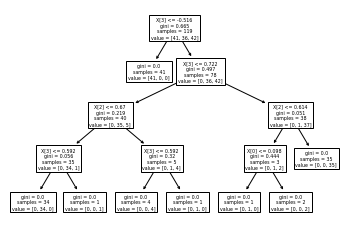

In [32]:
tree.plot_tree(dt)

In [ ]:
#Bagging Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [49]:
 bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [50]:
bagpred= bag_model.predict(X_test)

In [51]:
reports = metrics_(y_test, bagpred)
reports.cr()
reports.cm()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [36]:
bag_model.oob_score_ #oob_score_ is the accuracy

0.9495798319327731

In [ ]:
#XGB Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
xgb = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
xgb.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=2, max_features=2, n_estimators=20,
                           random_state=0)

In [52]:
xgbpredct = xgb.predict(X_test)

In [53]:
reports = metrics_(y_test, xgbpredct)
reports.cr()
reports.cm()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [44]:
xgb.score(X_train, y_train)

0.9747899159663865